<a href="https://colab.research.google.com/github/feist000/machine-learning-Edu/blob/master/0820_Cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 교차 검증 
- 교차 검증의 의미 
- 실습 진행 

## 방법 1. 홀드아웃
- 데이터 : 훈련데이터와 테스트데이터
  + 훈련데이터 : 훈련데이터 + 검증데이터 --> 테스트데이터 

### 방법 2. K폴드 교차검증
- 데이터의 수가 적을 때 주로 사용
- Default 연산량 X K개 만큼 


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston 

In [23]:
%matplotlib inline
boston = load_boston()

bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

bostonDF['PRICE']= boston.target
print('Size of Dataset:', bostonDF.shape)

Size of Dataset: (506, 14)


In [24]:
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 데이터 탐색 
- 시각화, 통계 검정 
- 변수 정의

[참고자료](https://scikit-learn.org/stable/datasets/index.html#boston-dataset)

CRIM per capita crime rate by town

ZN proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS proportion of non-retail business acres per town

CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX nitric oxides concentration (parts per 10 million)

RM average number of rooms per dwelling

AGE proportion of owner-occupied units built prior to 1940

DIS weighted distances to five Boston employment centres

RAD index of accessibility to radial highways

TAX full-value property-tax rate per $10,000

PTRATIO pupil-teacher ratio by town

B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT % lower status of the population

MEDV Median value of owner-occupied homes in $1000’s

*데이터 시각화를 진행한다.*

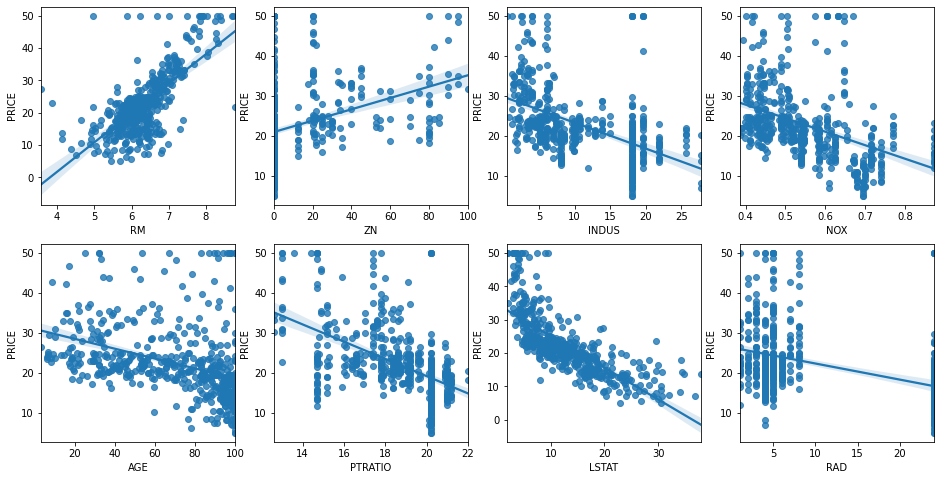

In [29]:
# 2행 4열 subplots 이용. axs = 4x2의 ax 

fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4

# seaborn의 regplot을 이용해서 산점도와 선형 회귀 직선을 함께 표현했다.
    sns.regplot(x=feature , y='PRICE', data=bostonDF , ax=axs[row][col])

*이제 회귀 모형을 만들어보자.*

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 훈련데이터, 테스트 분리
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(["PRICE"],axis=1, inplace=False)   # 종속변수랑 독립변수를 분리하는 과정.


X_train, X_test, y_train, y_test = train_test_split(X_data,y_target,test_size=0.3, random_state=156)

# 모형을 만들기 - 선형회귀 
Ir_model = LinearRegression()
Ir_model.fit(X_train,y_train)   # 모형을 만드는 함수 


# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))


# 예측 
y_preds = Ir_model.predict(X_test)



MSE : 17.297 , RMSE : 4.159
Variance score : 0.757


- mean_squared_error(MSE) : 실제값과 예측값의 차이를 제곱 후 평균 
- RMSE : 실제 오류 평균보다 커지는 일이 많아서 루트를 씌움.


- RMSE란?
평균 제곱근 오차.관측값들간의 상호간 편차를 의미한다. 
표준편차를 일반화시킨 척도로서 
실제값과 추정값과의 차이가 얼마인가를 알려주는데 많이 사용되는 척도.

In [35]:
mse = mean_squared_error(y_test,y_preds)
print(mse)

17.296915907902008


In [36]:
rmse = np.sqrt(mse)
print(rmse)

4.1589561079556985


# K 폴드 적용 
- cross_val_score() 함수 활용해서 RMSE
 + 5 폴드값
 (참고) scoring = neg_mean_squarred_ereror 지정 시, 반환되는 수치 값은 음수 값이다. -1은 RMSE 값을 구하기 위해서는 양수로 출력해야 하기 때문에 곱해준 것. 

In [39]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr = LinearRegression()

# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE를 구한다.
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores) # 위에서 말한 것처럼 양수로 출력하기 위해서 -1를 곱해준 것.
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829 


In [40]:
rmse_scores = np.sqrt(-1*neg_mse_scores)

In [41]:
np.mean(rmse_scores)

5.828658946215802

# 결론
- 교차검증의 목적은 적은 데이터에서 주로 사용하는 것. 
- 회귀 모형의 평가는 크게 RMSE와 R2(R의 2승)으로 나뉜다. 
- RMSE는 작을수록 좋은 모형. (RMSE=오차값)
- R2 클수록 좋은 모형.

-- END